<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span><ul class="toc-item"><li><span><a href="#Обобщенный-вывод(рекомендация):" data-toc-modified-id="Обобщенный-вывод(рекомендация):-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Обобщенный вывод(рекомендация):</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.info()
display(df.head(50))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

**Ознакомившись предварительно с предоставленными данными, обнаруживаем пропуски в важных для нас столбцах, а именно : жилая
площадь, площадь кухни, расстояние до центра, количество дней размещения объявления, высота потолков. Также некоторые заголовки 
столбцов надо поменять на "стильные". В кое-каких столбцах немного неверный тип значений.**

# Предобработка данных

In [2]:
# убираем из таблицы типы населенных пунктов, чтобы не мешали при анализе дублями

#print(df['locality_name'].unique())
type_localitity_name = ['посёлок ','городской посёлок ','деревня ','поселок городского типа ',
                        'поселок ','садовое товарищество ','село ','городской поселок ','поселок станции ',
                        'посёлок городского типа ','коттеджный поселок ','посёлок при железнодорожной станции ','коттеджный  ',
                        'при железнодорожной станции ','садоводческое некоммерческое товарищество ','городского типа ',
                        'станции ','коттеджный ','городской ']
    
for name in type_localitity_name:
    df['locality_name'] = df['locality_name'].str.replace(name, '')    
    
#print(df['locality_name'].value_counts().head(20))


In [3]:
# заполняем пропуски до центра медианными значениями по населенным пунктам.
for name in df['locality_name'].unique():
    median = df.loc[df['locality_name'] == name, 
                    'cityCenters_nearest'].median()
    #print(name, median)
    df.loc[(df['cityCenters_nearest'].isna()) & (df['locality_name'] == name), 'cityCenters_nearest'] = median
#print(df['cityCenters_nearest'].isna().sum())


#видимо не во всех населеннных пунктах указано расстояние от объекта до центра Питера, оставшиеся пропуски заполняем медианными 
#значениями по всему фрейму
df.loc[df['cityCenters_nearest'].isna(), 'cityCenters_nearest'] = df['cityCenters_nearest'].median()
#print(df['cityCenters_nearest'].isna().sum())

df = df.rename(columns = {'cityCenters_nearest':'city_centers_nearest'}) #меняем название столбца на "стильное"

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [4]:
#приводим дату размещения объявления к нужному формату
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d %H:%M')

#пропуски в столбце по дням размещения заполняем разницей между датой размещения самого последнего объявления и датой объявления с пропуском
max_date = df['first_day_exposition'].max()
df.loc[df['days_exposition'].isna(), 'days_exposition'] = (max_date - df.loc[df['days_exposition'].isna(),'first_day_exposition']).dt.days 
df['days_exposition'] = df['days_exposition'].astype(int) # меняем значения столбца на целые
#print('Пропуски после {}'.format(df['days_exposition'].isna().sum()))
#display(df.head())

In [5]:
#меняем пропуски в столбце балконы на 0, предполагая, что их нет
df.loc[df['balcony'].isna(), 'balcony'] = 0
df['balcony'] = df['balcony'].astype(int) # меняем значения столбца на целые


#меняем пропуски в столбце апартаменты на False, предполагая, что это не апартаменты
df.loc[df['is_apartment'].isna(), 'is_apartment'] = 0
df['is_apartment'] = df['is_apartment'].astype(bool) # меняем значения столбца на булевы
#print(df['is_apartment'].unique())


df.loc[df['ceiling_height'].isna(), 'ceiling_height'] = df['ceiling_height'].median() #заполняем пропуски высоты потолков медианным значением
#print('Пропуски после:', df['ceiling_height'].isna().sum())


df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = df['kitchen_area'].median() #заполняем пропуски площадей кухни медианным значением
#print('Пропуски после:', df['kitchen_area'].isna().sum())


df.dropna(subset = ['locality_name'], inplace=True) #т.к. количество объектов, где не указано название города слишком мало, просто удаляем эти строки 



df.dropna(subset = ['floors_total'], inplace=True) #т.к. количество объектов, где не указана этажность домов слишком мало, просто удаляем эти строки 
df['floors_total'] = df['floors_total'].astype(int) # и меняем значения на целые



#заполняем пропуски жилой площади по формуле "общая площадь" - "площадь кухни" - "площадь служебных помещений(которые в среднем 25% от общей площади)"
df.loc[df['living_area'].isna(), 'living_area'] = df['total_area'] - df['total_area']*0.25 - df['kitchen_area']
#print('Пропуски после:', df['living_area'].isna().sum())


#меняем пропуски в столбце парки в округе на 0, предполагая, что их нет
df.loc[df['parks_around3000'].isna(), 'parks_around3000'] = 0
df['parks_around3000'] = df['parks_around3000'].astype(int) # меняем значения столбца парки в округе на целые
df = df.rename(columns = {'parks_around3000':'parks_around_3000'}) #меняем название столбца на "стильное"


#меняем пропуски в столбце водоемы в округе на 0, предполагая, что их нет
df.loc[df['ponds_around3000'].isna(), 'ponds_around3000'] = 0
df['ponds_around3000'] = df['ponds_around3000'].astype(int)# меняем значения столбца водоемы в округе на целые
df = df.rename(columns = {'ponds_around3000':'ponds_around_3000'}) #меняем название столбца на "стильное"


#df.info()
#display(df.head(10))


###  Вывод

**На этапе предобработки данных, я избавился в столбце "locality_name" от типов населенных пунктов, чтобы не было дублирующих названий типа "село Петровка" и "деревня Петровка". Затем заполнил пропуски расстояния до центра Питера по медианным значениям каждого населенного пункта, где была возможнось его посчитать. Где такой возможности не было, заполнил пропуски по медианному значению всего датафрейма.**

**Заполнил пропуски дней размещения объяления по формуле: разница между датой размещения самого последнего объявления и датой объявления с пропуском.**

**Пропуски высоты потолков заменил медианным значением, также как и пропуски в площади кухни.**

**Небольшое количество квартир было без указания населенного пункта и этажности здания, принял решение удалить такие строки методом "dropna".**

**Пропуски значений "жилая площадь" заменил по формуле: "общая площадь" - "площадь кухни" - "площадь служебных помещений(которые в среднем 25% от общей площади)".**

**Попутно заменил на 0 пропуски в столбцах : балконы, водоемы в округе, парки в округе, предполагая, что их нет, здесь же значения поменял на целые.**

**Пропуски в столбце "is_apartment" заменил на 0 , предполагая, что это не апартаменты, и тип значений сделал булевым.**

**Названия столбцов 'cityCenters_nearest', 'ponds_around3000', 'parks_around3000' привел к "стильному" виду соответственно 'city_centers_nearest', 'ponds_around_3000', 'parks_around_3000'.**

## Расчёты и добавление результатов в таблицу

In [6]:
df['price_sq_m'] = df['last_price'] / df['total_area']#добавляем в таблицу цену кв.м


In [7]:
df['day_of_week_of_publication'] = df['first_day_exposition'].dt.weekday #добавляем в таблицу день недели публикации
df['month_of_publication'] = df['first_day_exposition'].dt.month #добавляем в таблицу месяц публикации
df['year_of_publication'] = df['first_day_exposition'].dt.year #добавляем в таблицу год публикации


In [8]:
def floors(row): #создаем функцию для распределения этажей по группам
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
df['floor_group'] = df.apply(floors, axis=1)  


In [9]:
df['ratio_living_total'] = df['living_area'] / df['total_area'] #добавляем соотношение жилой площади к общей
df['ratio_kitchen_total'] = df['kitchen_area'] / df['total_area'] # добавляем соотношение площади кухни к общей
#display(df.head())

### Вывод

**Согласно ТЗ добавил в таблицу цену кв.м, день недели, месяц, год публикации объявления, распределение этажей по группам, соотношение жилой площади к общей и соотношение площади кухни к общей площади.**  

## Исследовательский анализ данных

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

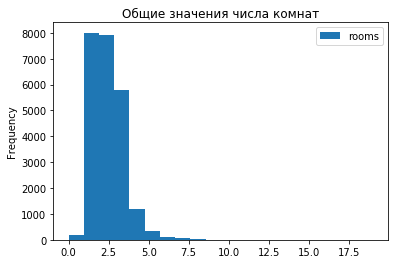

In [10]:
import matplotlib.pyplot as plt 
 
display(df['rooms'].describe())
df.plot(y='rooms', kind='hist', title='Общие значения числа комнат', bins=20)
plt.show()

**Почти очевидно, что пиковые значения - это 1,2,3-х комнатные квартиры**

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

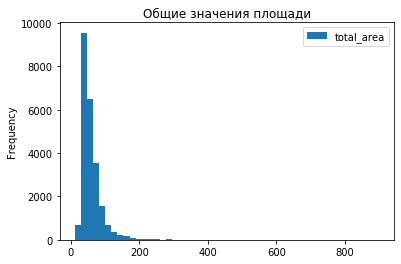

In [11]:
display(df['total_area'].describe())
df.plot(y='total_area', kind='hist', title='Общие значения площади',bins=50)
plt.show()

**Пиковые значения - это 30-60 кв.м , довольно большой массив 60-90 кв.м, заметное количество 18-30 кв.м и 90-100 кв.м,
квартиры площадью более 113 кв.м, согласно диаграмме размаха , являются выбросами .**

count        23565.0
mean       6540058.0
std       10910935.0
min          12190.0
25%        3400000.0
50%        4646000.0
75%        6790000.0
max      763000000.0
Name: last_price, dtype: float64

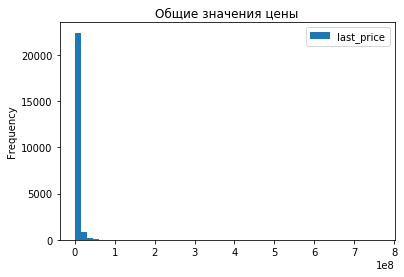

In [12]:
display(df['last_price'].describe().round(0))
df.plot(y='last_price', kind='hist', title='Общие значения цены', bins=50)
plt.show()

**Среднее значение почти в 1,5 раза больше медианы, значит есть длинный хвост с высокими значениями или несколько очень больших значений.
Разница между Q1 и Q3 3390000, значит квартиры стоимостью более 11875000р. являются выбросами. 
По значению цены довольно сложно что-то понять, думаю лучше обратиться к цене квадратного метра.**

count    23565.000000
mean         2.724530
std          0.991026
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

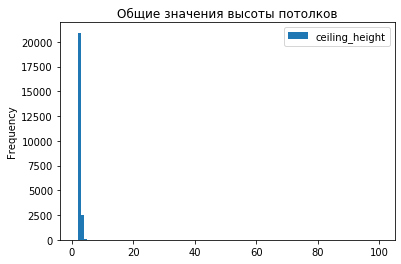

In [13]:
display(df['ceiling_height'].describe())
df.plot(y='ceiling_height', kind='hist', title='Общие значения высоты потолков', bins=100)
plt.show()

**Пик значений 2,6-2,7 м, Разница между Q1 и Q3 0,1м, значит согласно диаграмме рассеивания , потолки выше 2,85 и ниже 2,45 это выбросы.**

count      23565.0
mean       99406.0
std        50389.0
min          112.0
25%        76566.0
50%        95000.0
75%       114213.0
max      1907500.0
Name: price_sq_m, dtype: float64

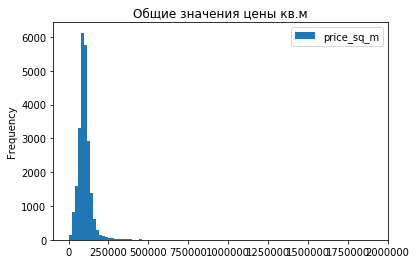

In [14]:
display(df['price_sq_m'].describe().round(0))
df.plot(y='price_sq_m', kind='hist', title='Общие значения цены кв.м', bins=100)
plt.show()

**Основной разбег цены за кв.м от 75000 р. до 120000 р.Согласно диаграмме рассеивания, выбросы начинаются до цены 20096р. за кв.м и после цены 170683р. за кв.м**

count    23565.000000
mean       185.759728
std        233.492930
min          0.000000
25%         43.000000
50%         94.000000
75%        237.000000
max       1618.000000
Name: days_exposition, dtype: float64

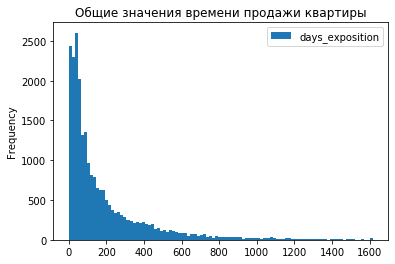

In [15]:
display(df['days_exposition'].describe())
df.plot(y='days_exposition', kind='hist', title='Общие значения времени продажи квартиры', bins=100)
plt.show()

**Среднее в 2,5 раза больше медианы,значит есть длинный хвост с высокими значениями или несколько очень больших значений.
Обычно продажи занимают от 0 до 528 дней согласно "диаграмме размаха". Все что больше, можно считать выбросами, т.е. необычно долго.Быстрыми ,возможно, можно считать продажи в пределах 1-го квартиля, т.е. до 43 дней.**

In [16]:
df['too_fast_sale'] = (df['days_exposition'] < 43)# добавляем столбец со "слишком быстрыми" продажами
df['too_slow_sale'] = (df['days_exposition'] > 528)# добавляем столбец с долгими продажами
display(df.head())
print(df['too_fast_sale'].mean())# считаем процент быстрых продаж
print(df['too_slow_sale'].mean())# считаем процент долгих продаж

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_sq_m,day_of_week_of_publication,month_of_publication,year_of_publication,floor_group,ratio_living_total,ratio_kitchen_total,too_fast_sale,too_slow_sale
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.00,8,False,...,57,120370.370370,3,3,2019,другой,0.472222,0.231481,False,False
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.60,1,False,...,81,82920.792079,1,12,2018,первый,0.460396,0.272277,False,False
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.30,4,False,...,558,92785.714286,3,8,2015,другой,0.612500,0.148214,False,True
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,110.15,9,False,...,424,408176.100629,4,7,2015,другой,0.692767,0.057233,False,False
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00,13,False,...,121,100000.000000,1,6,2018,другой,0.320000,0.410000,False,False


0.2480797793337577
0.08253766178654785


**Процент долгих продаж очень небольшой, для анализа думаю можно проститься с ними без печали.**

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17525 entries, 1 to 23696
Data columns (total 31 columns):
total_images                  17525 non-null int64
last_price                    17525 non-null float64
total_area                    17525 non-null float64
first_day_exposition          17525 non-null datetime64[ns]
rooms                         17525 non-null int64
ceiling_height                17525 non-null float64
floors_total                  17525 non-null int64
living_area                   17525 non-null float64
floor                         17525 non-null int64
is_apartment                  17525 non-null bool
studio                        17525 non-null bool
open_plan                     17525 non-null bool
kitchen_area                  17525 non-null float64
balcony                       17525 non-null int64
locality_name                 17525 non-null object
airports_nearest              12945 non-null float64
city_centers_nearest          17525 non-null float64
par

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_sq_m,day_of_week_of_publication,month_of_publication,year_of_publication,floor_group,ratio_living_total,ratio_kitchen_total,too_fast_sale,too_slow_sale
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,81,82920.792079,1,12,2018,первый,0.460396,0.272277,False,False
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,55,95065.789474,0,9,2018,другой,0.473684,0.299342,False,False
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,155,99195.710456,3,11,2017,другой,0.284182,0.386059,False,False
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,34.80,22,False,...,15,110544.692737,3,4,2019,другой,0.486034,0.263966,True,False
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,189,87454.764777,2,5,2018,другой,0.465320,0.265682,False,False


count    17525.000000
mean       123.489986
std        121.340082
min          0.000000
25%         36.000000
50%         76.000000
75%        175.000000
max        527.000000
Name: days_exposition, dtype: float64

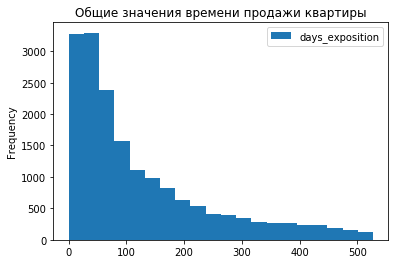

In [17]:
df = df.query('days_exposition<528') # оставляем в таблице данные без долгих продаж.
df = df.query('0 < rooms < 5') #оставляем в таблице 1,2,3,4-комнатные квартиры.
df = df.query('0 < total_area < 113') # оставляем в таблице квартиры площадью до 113 кв.м.
df = df.query('0 < last_price < 11875000') # оставляем в таблиц квартиры с ценой до 11875000р.
df = df.query('2.45 < ceiling_height < 2.85') # оставляем в таблице квартиры с потолками от 2,45 до 2,85 м.
df = df.query('20096 < price_sq_m < 170683') # оставляем в таблице цену за кв.м от 20096р. за кв.м и до 170683р. за кв.м
df.info()
display(df.head())
display(df['days_exposition'].describe())
df.plot(y='days_exposition', kind='hist', title='Общие значения времени продажи квартиры', bins=20)
plt.show()

**В дальнейшем исследовании буду использовать цену кв.м, т.к. мне кажется это более правильный подход, а также совет преподавателя.**

-0.08449969931004578


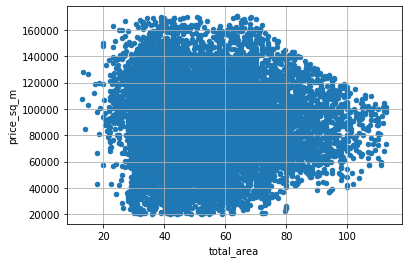

In [18]:
df.plot(x='total_area', y='price_sq_m', kind='scatter', grid=True)# строим график зависимости цены кв.м и
                                                                            #  площади квартиры 
print(df['total_area'].corr(df['price_sq_m'])) # также проверяем кореляцию

**В данном случае , по кореляции особой связи между площадью квартиры и цены кв.м не замечено. а по графику снижение после 80кв.м**

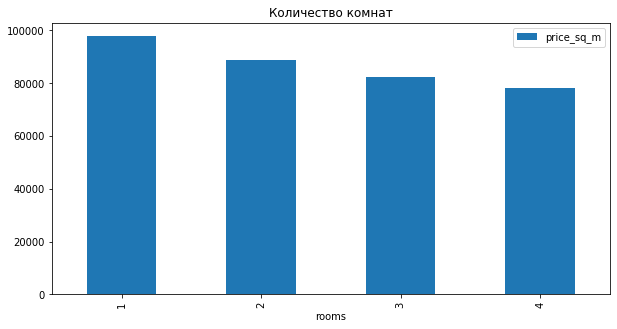

In [19]:
df.pivot_table(index = 'rooms', values = 'price_sq_m').plot(kind = 'bar', title = 'Количество комнат', figsize = (10,5))
# строим график зависимости количества комнат цены кв.м 
plt.show()

**В зависимости от количества комнат  цена кв.м с добавлением каждой комнаты снижается. У 2-х комнатных квартир снижение по отношению к однокомнатной на 10%, далее по 5% .**

-0.17960320075274885


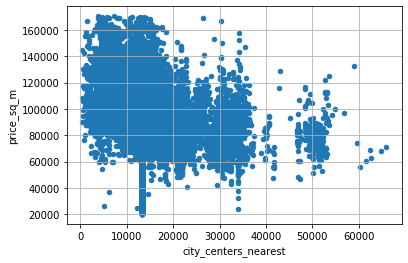

In [20]:
df.plot(x='city_centers_nearest', y='price_sq_m', kind='scatter', grid=True)# строим график зависимости удаленности от центра и
                                                                            #  цены кв.м 
print(df['city_centers_nearest'].corr(df['price_sq_m'])) # также проверяем кореляцию

**С увеличением дальности от центра , цена кв.м снижается.**

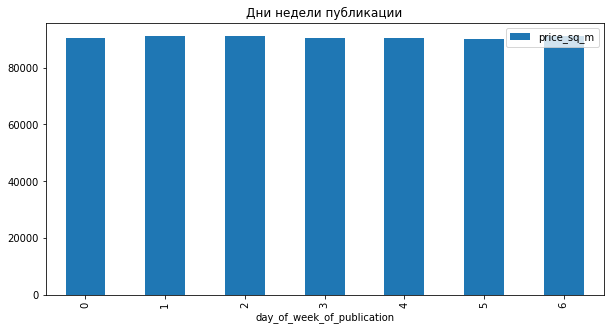

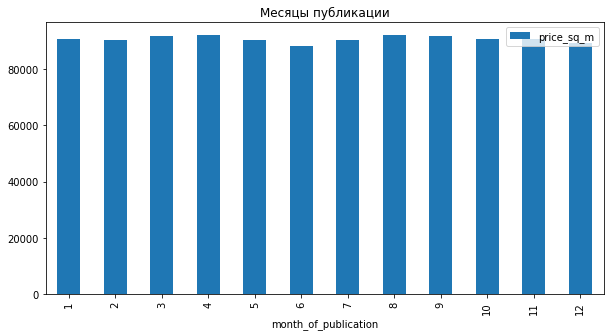

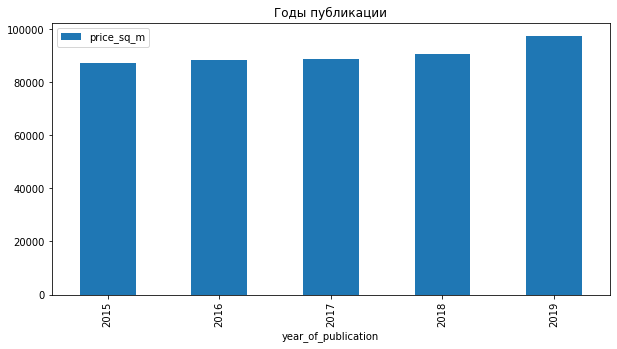

In [21]:
df.pivot_table(index = 'day_of_week_of_publication', values = 'price_sq_m').plot(kind = 'bar', title = 'Дни недели публикации', figsize = (10,5))
# строим график зависимости дня недели 
plt.show()

df.pivot_table(index = 'month_of_publication', values = 'price_sq_m').plot(kind = 'bar', title = 'Месяцы публикации', figsize = (10,5))
# строим график зависимости месяца размещения объявления и цены кв.м
plt.show()

df.pivot_table(index = 'year_of_publication', values = 'price_sq_m').plot(kind = 'bar', title = 'Годы публикации', figsize = (10,5))
# строим график зависимости года размещения объявления и цены кв.м
plt.show()

**Цена кв.м почти не зависит от дня недели, месяца размещения объявления, но с 2016 года наблюдается с каждым годом рост цены примерно на 2%, и в 2019 году цены подросли примерно на 7%.**

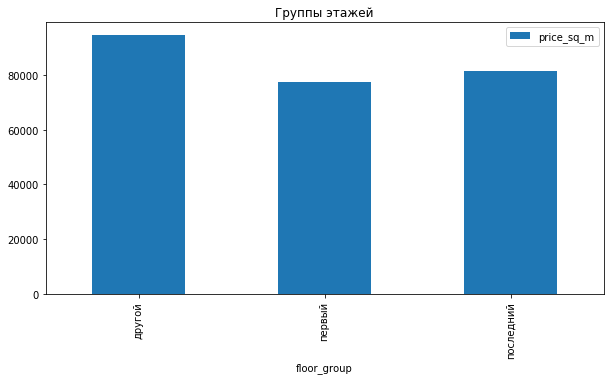

In [22]:
# строим график зависимости этажа и цены кв.м 

df.pivot_table(index = 'floor_group', values = 'price_sq_m').plot(kind = 'bar', title = 'Группы этажей', figsize = (10,5))
plt.show()

**Судя по графику , на первых этажах цена кв.м ниже на 15%, а на последних на 10% чем на других этажах.**

In [23]:
top_10 = df['locality_name'].value_counts().head(10) #находим населенные пункты, где больше всего объявлений
#display(top_10)

In [24]:
df_top_10 = df.query('locality_name in ("Санкт-Петербург", "Мурино", "Кудрово", "Шушары", "Всеволожск", "Пушкин", "Колпино", "Парголово", "Гатчина", "Выборг")')

#находим среднюю цену кв.м в выбраных населенных пунктах
df_top_10 = df_top_10.pivot_table(index='locality_name', values='price_sq_m', aggfunc='mean')

display(df_top_10.sort_values(by='price_sq_m', ascending = False))

,price_sq_m
locality_name,
Санкт-Петербург,103692.273995
Пушкин,99349.476501
Кудрово,95158.409125
Парголово,90223.580262
Мурино,85646.412268
Шушары,78155.158559
Колпино,75325.618727
Гатчина,68771.595862
Всеволожск,66723.202631


**В населенных пунктах, где больше всего обьявлений, самая высокая цена кв.м в Санкт-Петербурге(103692.273995 р. за кв.м).**  

**Самая низкая цена в Выборге(57881.332646 р. за кв.м)**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_sq_m,day_of_week_of_publication,month_of_publication,year_of_publication,floor_group,ratio_living_total,ratio_kitchen_total,too_fast_sale,too_slow_sale
7,5,7915000.0,71.6,2019-04-18,2,2.65,24,34.8,22,False,...,15,110544.692737,3,4,2019,другой,0.486034,0.263966,True,False
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,289,88524.590164,6,2,2017,другой,0.714754,0.106557,False,False
10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,137,127525.252525,3,11,2017,другой,0.512626,0.214646,False,False
15,16,4650000.0,39.0,2017-11-18,1,2.65,14,20.5,5,False,...,19,119230.769231,5,11,2017,другой,0.525641,0.194872,True,False
18,8,3250000.0,31.0,2017-01-27,1,2.50,5,19.4,2,False,...,168,104838.709677,4,1,2017,другой,0.625806,0.180645,False,False


,price_sq_m
city_centers_nearest,
0,113932.072819
1,114635.875108
2,111070.527169
3,108749.176375
4,118345.562036
5,117466.062282
6,119909.219188
7,116331.967741
8,109271.918208


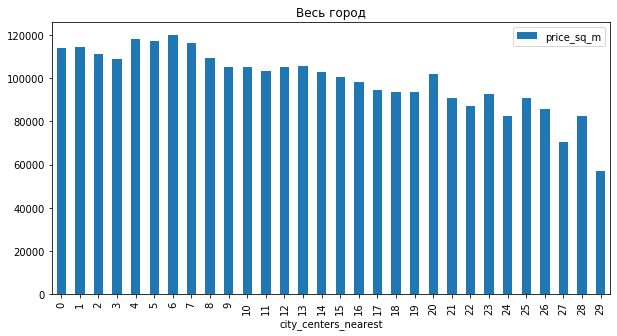

In [25]:
df_sp = df.query('locality_name in "Санкт-Петербург"') # оставляем данные только по Питеру

#df_sp = df_sp.drop(df_sp.columns[[0, 9, 10, 11, 18, 19, 20, 26, 27]], axis=1) # удаляем несколько ненужных пока столбцов

df_sp['city_centers_nearest'] = (df_sp['city_centers_nearest'] / 1000).astype(int)# переводим расстояния в "целые" километры

min_nearest = df_sp['city_centers_nearest'].min()#на всякий случай проверяем min и max
max_nearest = df_sp['city_centers_nearest'].max()

df_nearest_sq_m = df_sp.pivot_table(index='city_centers_nearest', values='price_sq_m', aggfunc='mean')#создаем табличку км-кв.м
display(df_sp.head())
#print(min_nearest)
#print(max_nearest)
df_sort = df_nearest_sq_m.sort_values(by='city_centers_nearest', ascending = True)# сортируем по возрастанию
display(df_sort)
df_sort.plot(kind = 'bar', title = 'Весь город', figsize = (10,5)) # ну и график для наглядности
plt.show()

**Цена за кв.м сильно меняется после 7-го километра от центра, отсюда делаем вывод , что центральная зона в радиусе 7км.** 

In [26]:
df_sp_centre = df_sp.query('city_centers_nearest<=7')

display(df_sp_centre.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_sq_m,day_of_week_of_publication,month_of_publication,year_of_publication,floor_group,ratio_living_total,ratio_kitchen_total,too_fast_sale,too_slow_sale
24,8,6500000.0,97.2,2015-10-31,2,2.65,3,46.5,1,False,...,265,66872.427984,5,10,2015,первый,0.478395,0.201646,False,False
94,3,3500000.0,29.5,2019-04-26,1,2.50,5,15.6,2,False,...,4,118644.067797,4,4,2019,другой,0.528814,0.186441,True,False
99,32,9600000.0,90.0,2017-09-26,4,2.65,5,67.0,2,False,...,104,106666.666667,1,9,2017,другой,0.744444,0.088889,False,False
111,4,4590000.0,40.0,2017-05-29,1,2.65,6,18.0,1,False,...,31,114750.000000,0,5,2017,первый,0.450000,0.250000,True,False
138,8,4800000.0,40.0,2017-11-18,2,2.65,3,29.0,2,False,...,80,120000.000000,5,11,2017,другой,0.725000,0.150000,False,False


count    1157.000000
mean       60.987632
std        19.764764
min        13.200000
25%        45.000000
50%        59.400000
75%        74.200000
max       112.700000
Name: total_area, dtype: float64

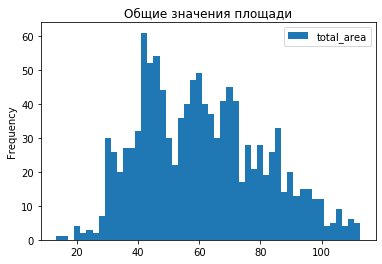

In [27]:
display(df_sp_centre['total_area'].describe())

df_sp_centre.plot(y='total_area', kind='hist', title='Общие значения площади',bins=50)
plt.show()

**В отличие от общего массива, медиана практически совпадает со средним значением,очень большой сегмент квартир с плошадью 40-80 кв.м, согласно теоретического курса, здесь нормальное распределение.**

count      1157.0
mean     116225.0
std       23890.0
min       26250.0
25%       98888.0
50%      114416.0
75%      132911.0
max      170312.0
Name: price_sq_m, dtype: float64

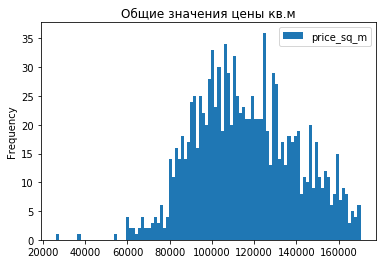

In [28]:
display(df_sp_centre['price_sq_m'].describe().round(0))

df_sp_centre.plot(y='price_sq_m', kind='hist', title='Общие значения цены кв.м',bins=100)
plt.show()

**Здесь также в отличие от общего массива, медиана практически совпадает со средним значением,очень большой сегмент квартир с ценой 80000-140000 р. за кв.м, согласно теоретического курса, здесь нормальное распределение.**

count    1157.000000
mean        2.653933
std         0.072537
min         2.460000
25%         2.650000
50%         2.650000
75%         2.650000
max         2.840000
Name: ceiling_height, dtype: float64

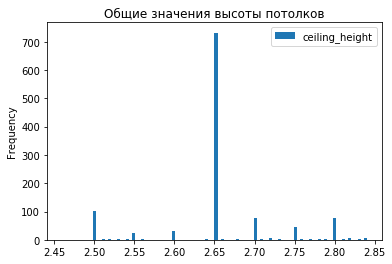

In [29]:
display(df_sp_centre['ceiling_height'].describe())
df_sp_centre.plot(y='ceiling_height', kind='hist', title='Общие значения высоты потолков', bins=100)
plt.show()

**Здесь тоже ничего выбивающегося из нормального распределения**

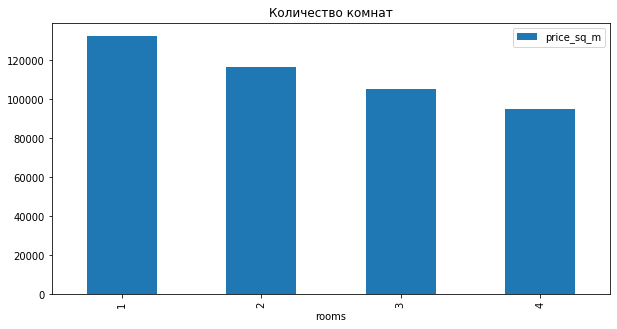

In [30]:
df_sp_centre.pivot_table(index = 'rooms', values = 'price_sq_m').plot(kind = 'bar', title = 'Количество комнат', figsize = (10,5))
# строим график зависимости количества комнат цены кв.м
plt.show()

**Цена квадратного метра c увеличением числа комнат снижается на 20,15,10 тыс.р соответственно**

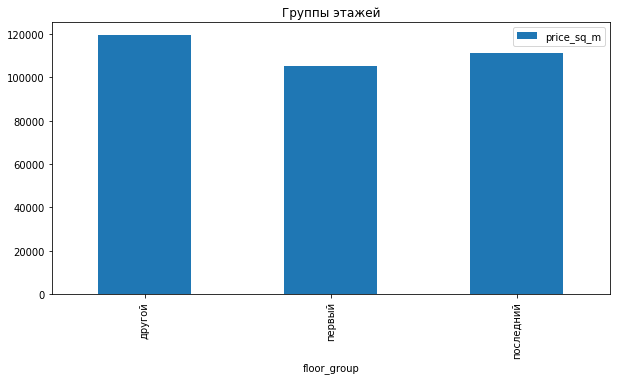

In [31]:
df_sp_centre.pivot_table(index = 'floor_group', values = 'price_sq_m').plot(kind = 'bar', title = 'Группы этажей', figsize = (10,5))
# строим график зависимости  этажа и цены кв.м 
plt.show()

**Судя по графику , на первых этажах цена кв.м ниже на 15%, а на последних на 10% чем на других этажах. Такая же тенденция наблюдается в общем массиве.**

0.07903528328113396


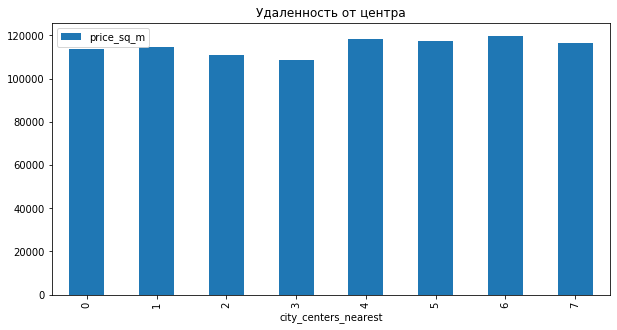

In [32]:
df_sp_centre.pivot_table(index = 'city_centers_nearest', values = 'price_sq_m').plot(kind = 'bar', title = 'Удаленность от центра', figsize = (10,5))
# строим график зависимости удаленности от центра и цены кв.м 
print(df_sp_centre['city_centers_nearest'].corr(df_sp_centre['price_sq_m'])) # также проверяем кореляцию

**В пределах выделеной центральной зоны , цены после 3-го километра немного поползли вверх, но по объяснению преподавателя, это какой-то "ржавый пояс" Питера.**

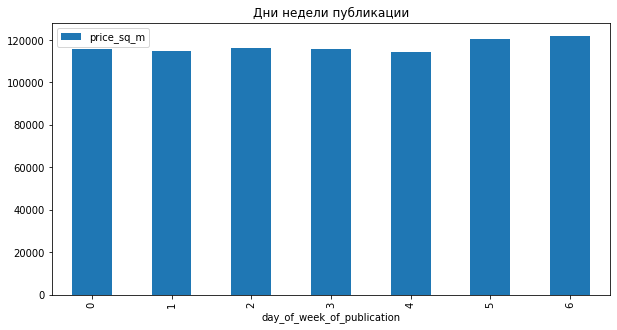

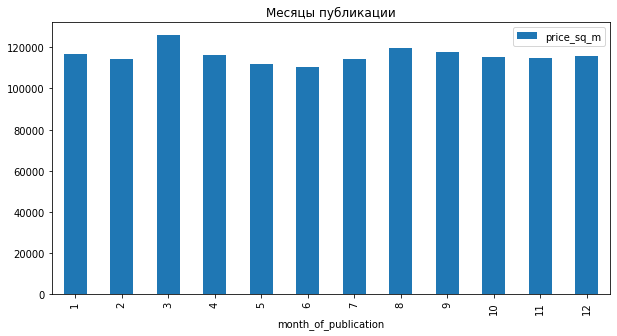

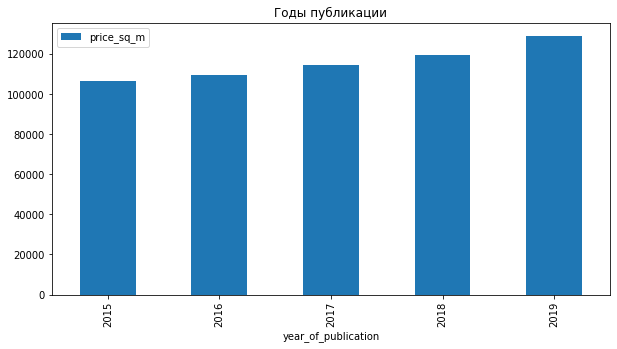

In [33]:
df_sp_centre.pivot_table(index = 'day_of_week_of_publication', values = 'price_sq_m').plot(kind = 'bar', title = 'Дни недели публикации', figsize = (10,5))
# строим график зависимости дня недели 
plt.show()

df_sp_centre.pivot_table(index = 'month_of_publication', values = 'price_sq_m').plot(kind = 'bar', title = 'Месяцы публикации', figsize = (10,5))
# строим график зависимости месяца размещения объявления и цены кв.м
plt.show()

df_sp_centre.pivot_table(index = 'year_of_publication', values = 'price_sq_m').plot(kind = 'bar', title = 'Годы публикации', figsize = (10,5))
# строим график зависимости года размещения объявления и цены кв.м
plt.show()

**От дня недели, когда разместили объявление цена кв.м не зависит, от месяца, небольшое снижение замечено в мае-июле,  и с каждым годом цена растет примерно на 5%.**

## Общий вывод

**На этапе предобработки данных было устранено много пропусков в значениях, датафрейм был приведен к виду, который уже можно было анализировать.**

**Согласно ТЗ в таблицу были добавлены новые столбцы с данными.**

**На этапе исследовательского анализа был очищен датафрейм от выбросов согласно межквартильному размаху:**

**Почти очевидно, что пиковые значения - это 1,2,3-х комнатные квартиры.**

**Пиковые значения - это 30-60 кв.м , довольно большой массив 60-90 кв.м, заметное количество 18-30 кв.м и 90-100 кв.м,
квартиры площадью более 113 кв.м, согласно диаграмме размаха , являются выбросами .**

**Среднее значение почти в 1,5 раза больше медианы, значит есть длинный хвост с высокими значениями или несколько очень больших значений.
Разница между Q1 и Q3 3390000, значит квартиры стоимостью более 11875000р. являются выбросами. 
По значению цены довольно сложно что-то понять, думаю лучше обратиться к цене квадратного метра.**

**Пик значений по потолкам 2,6-2,7 м, Разница между Q1 и Q3 0,1м, значит согласно диаграмме рассеивания , потолки выше 2,85 и ниже 2,45 это выбросы.**

**Основной разбег цены за кв.м от 75000 р. до 120000 р.Согласно диаграмме рассеивания, выбросы начинаются до цены 20096р. за кв.м и после цены 170683р. за кв.м**

**Среднее время продажи квартиры в 2,5 раза больше медианы,значит есть длинный хвост с высокими значениями или несколько очень больших значений.
Обычно продажи занимают от 0 до 528 дней согласно "диаграмме размаха". Все что больше, можно считать выбросами, т.е. необычно долго.Быстрыми ,возможно, можно считать продажи в пределах 1-го квартиля, т.е. до 43 дней.**



***На этапе исследования были получены следующие выводы для общего массива данных:***

**По кореляции особой связи между площадью квартиры и цены кв.м не замечено. а по графику снижение после 80кв.м**

**В зависимости от количества комнат цена кв.м с добавлением каждой комнаты снижается. У 2-х комнатных квартир снижение по отношению к однокомнатной на 10%, далее по 5% .**

**С увеличением дальности от центра , цена кв.м снижается.**

**Цена кв.м почти не зависит от дня недели, месяца размещения объявления, но с 2016 года наблюдается с каждым годом рост цены примерно на 2%, и в 2019 году цены подросли примерно на 7%.**

**Судя по кореляции зависимости нет, но если смотреть график , на первых этажах цена кв.м ниже на 15%, а на последних на 10% чем на других этажах.**

***По 10-ти населенным пунктам, где наибольшее количество объявлений:***

**В населенных пунктах, где больше всего обьявлений, самая высокая цена кв.м в Санкт-Петербурге(103692.273995 р. за кв.м).**  

**Самая низкая цена в Выборге(57881.332646 р. за кв.м)**

***Для центральной части Санкт-Петербурга сделал следующие выводы:***

**Цена за кв.м сильно меняется после 7-го километра от центра, отсюда делаем вывод , что центральная зона в радиусе 7км.**

**В отличие от общего массива, медиана площади квартир практически совпадает со средним значением,очень большой сегмент квартир с плошадью 40-80 кв.м, согласно теоретического курса, здесь нормальное распределение.**

**Для цены за кв.м также в отличие от общего массива, медиана практически совпадает со средним значением,очень большой сегмент квартир с ценой 80000-140000 р. за кв.м, согласно теоретического курса, здесь нормальное распределение.**

**Для высоты потолков тоже ничего выбивающегося из нормального распределения**

**Цена квадратного метра c увеличением числа комнат снижается на 20,15,10 тыс.р соответственно**

**Судя по графику , на первых этажах цена кв.м ниже на 15%, а на последних на 10% чем на других этажах. Такая же тенденция наблюдается в общем массиве.**

**В пределах выделеной центральной зоны , цены после 3-го километра немного поползли вверх, это так называемый  "ржавый пояс" Питера.**

**От дня недели, когда разместили объявление цена кв.м не зависит, от месяца, небольшое снижение замечено в мае-июле, и с каждым годом цена растет примерно на 5%.**

### Обобщенный вывод(рекомендация):

***На цену кв.м квартиры сильнее всего влияет количество комнат(чем больше комнат,тем кв.м дешевле), общая площадь квартиры(заметное снижение цены кв.м начинается с площади 80 кв.м), также с увеличением дальности от центра Питера(после 7-го км) цена линейно снижается, на 1-м этаже квартиры дешевле на 15%, а на последних на 10% относительно других этажей. По Ленинградской области самые дорогие квартиры в Санкт-Петербурге, самые дешевые в Выборге.Отдельно по Питеру, в радиусе 7км самые дорогие квартиры,причем с 0-го км до 3-го цена немного снижается, на 4-м происходит скачок вверх. Несмотря на все это , независимо от расположения с каждым годом цены растут примерно на 5%.***

***P.S. Самая дешевая квартира(с точки зрения цены кв.м) будет 4-х комнатная, на первом этаже, площадью 100 кв.м , в Выборге.***